<h3 style="color: #001a79;">Exercise 1.1</h3>

<hr style="border-top: 1px solid #001a79;" />

In Fisher's study of the tea problem, should the subject pick the correct four cups with milk in them first, there is only a 1 in 70 (~1.4%) chance of them having done that if they were simply guessing.

<h4>Exercise:</h4>
The above gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

The below has been adopted form this link: https://stackoverflow.com/a/4941932

In [1]:
# Math module imported
import math

In [2]:
# Number of ways of selecting 4 cups from 8 cups
math.comb(8, 4)

70

In [3]:
# Number of ways of selecting 5 cups from 10 cups
math.comb(10, 5)

252

In [4]:
# Probability of randomly selecting correct 5 cups is:
1.0 / math.comb(10, 5)

0.003968253968253968

Therefore, if this experiment was done with 10 cups of teas, where it has five with milk in first and five with tea in first. Then the chance of selecting correctly at random is much less than 1%.


To abide by the experiment design of ahving equal amounts of milk first cups and equal amounts of tea first cups then teh minimum number of cups would be 10.

*Bonus:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

<h3 style="color: #001a79;">Exercise 1.2</h3>

<hr style="border-top: 1px solid #001a79;" />

<h4>Exercise:</h4>
Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.


In [5]:
# Statistical methods imported 
import scipy.stats as ss

In [6]:
ss.fisher_exact

<function scipy.stats._stats_py.fisher_exact(table, alternative='two-sided')>

In [7]:
ss.fisher_exact([[4, 0], [0, 4]])

(inf, 0.028571428571428567)

The above is double the probability of geting 4 in 8 cups correct. See below

In [8]:
0.014285714285714285 * 2

0.02857142857142857

In [9]:
oddsratio, pvalue = ss.fisher_exact([[4, 0], [0, 4]])

In [10]:
pvalue

0.028571428571428567

In [11]:
oddsratio

inf

In [12]:
# adpoted from https://link.springer.com/content/pdf/bbm:978-3-319-28316-6/1.pdf

from scipy import stats
obs = [[3,1], [1,3]]
_, p = stats.fisher_exact(obs, alternative='greater')
print('\n--- A Lady Tasting Tea (Fisher Exact Test) ---')
print('The chance that the lady selects 3 or more cups correctly by chance is {0:5.3f}'.format(p))


--- A Lady Tasting Tea (Fisher Exact Test) ---
The chance that the lady selects 3 or more cups correctly by chance is 0.243


In [13]:

obs2 = [[4,0], [0,4]]
_, p2 = stats.fisher_exact(obs2, alternative='greater')
print('\n--- A Lady Tasting Tea (Fisher Exact Test) ---')
print('The chance that the lady selects 4 cups correctly by chance is {0:5.3f}'.format(p2))


--- A Lady Tasting Tea (Fisher Exact Test) ---
The chance that the lady selects 4 cups correctly by chance is 0.014


https://geanders.github.io/RProgrammingForResearch/exploring-data-3.html details experiment
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html

<h2 style="color: rgb(0, 91, 94);">$t$-Tests</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />


$t$-tests are among the most common statistical tests performed in world.

This notebook focuses on the practicalities of performing $t$-tests in Python.

For information about the $t$-test itself, I recommend reading [Laerd Statistics's Independent t-test using SPSS Statistics](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php).
$t$-tests are among the most common statistical tests performed in world.

<h2 style="color: rgb(0, 91, 94);">Packages</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

One of Python's strengths is the quality of numerical packages available.

In [14]:
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Mains statistics package.
import scipy.stats as ss

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

<h2 style="color: rgb(0, 91, 94);">Simulated Data</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

We can create fake data sets with specific properties to investigate numerical methods.

In [15]:
# Parameters for two different lists of numbers.
m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4
# Sample size.
N = 40

# Create two lists of numbers based on bell-shaped probability curves.
a = np.random.normal(loc=m_a, scale=s_a, size=N)
b = np.random.normal(loc=m_b, scale=s_b, size=N)

# Stick both samples in one data frame.
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})

# We can look directly at the list of numbers, but it's not very illuminating.
df

,Category,Value
0,A,1.140096
1,A,0.495942
2,A,0.206215
3,A,0.361270
4,A,1.151053
...,...,...
75,B,2.460667
76,B,1.677574
77,B,2.135235
78,B,1.755336


<h2 style="color: rgb(0, 91, 94);">Visualisation</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

A good plot can quickly show us what the numbers look like.

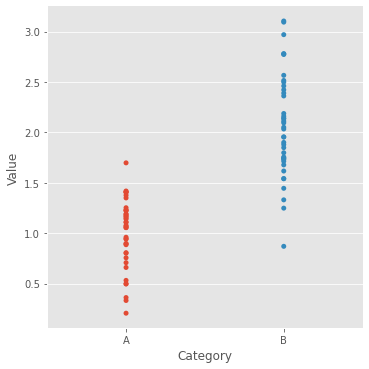

In [16]:
# One type of plot available in seaborn.
sns.catplot(x='Category', y='Value', jitter=False, data=df);

<h2 style="color: rgb(0, 91, 94);">The $t$-Test</h2>


<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Running a t-test in Python is done with a single function call. You can use scipy or statsmodels, amongst others.

In [17]:
# The scipy.stats version.
t_ss, p_ss = ss.ttest_ind(a, b)
print(f"t-value: {t_ss}\tp-value: {p_ss}")
print(f"P_scipy: {p_ss:0.2f}")

t-value: -11.000371914792726	p-value: 1.566097443095072e-17
P_scipy: 0.00


In [18]:
# The statsmodels version.
t_sm, p_sm, d_sm = stat.ttest_ind(a, b)
print(f"t-value: {t_sm}\tp-value: {p_sm}\tDeg Free: {d_sm}")
print(f"P_statsmodels: {p_sm:0.2f}")

t-value: -11.000371914792726	p-value: 1.566097443095072e-17	Deg Free: 78.0
P_statsmodels: 0.00


In [19]:
# Calculate t statistic "by hand".
# https://en.wikipedia.org/wiki/Test_statistic

# Length of the arrays.
n1 = len(a)
n2 = len(b)

# Means of the samples.
m1 = np.sum(a) / n1
m2 = np.sum(b) / n2

# Sample standard deviations.
s1 = np.sqrt(np.sum((a - m1)**2) / (n1 - 1))
s2 = np.sqrt(np.sum((b - m2)**2) / (n1 - 1))

df = n1 + n2 - 2
sp2 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / df
t = (m1 - m2) / (np.sqrt(sp2) * np.sqrt(1.0/n1 + 1.0/n2))

t

-11.000371914792726

<h2 style="color: rgb(0, 91, 94);">Populations</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

$t$-tests perform calculations on samples from two populations to test whether the populations are likely similar.

In the real world, we only see the samples and we cannot see the populations.

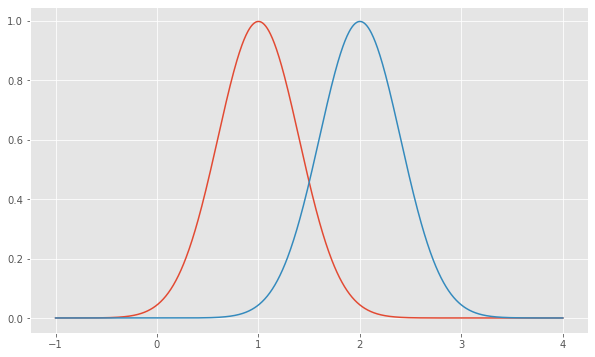

In [20]:
# Let's create a plot with the following x values.
min_x = min(m_a, m_b) - 5.0 * max(s_a, s_b)
max_x = max(m_a, m_b) + 5.0 * max(s_a, s_b)
x = np.linspace(min_x, max_x, 1000)

# We'll have plots of two different populations on one set of axes.
# These are normal probability density functions.
# See: https://en.wikipedia.org/wiki/Normal_distribution
y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

# Create and show the plot.
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y_a)
ax.plot(x, y_b)
plt.show()

<h2 style="color: rgb(0, 91, 94);">Critical Value</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The critical value is used to make a decision regarding the calculation of the $t$ statistic from the samples.

If the probability of seeing such a $t$ value given the hypothesis that there is no difference between the means is low, then data is suggesting that you should reject that hypothesis.

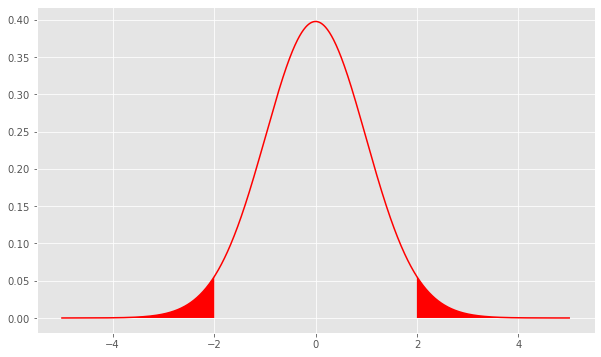

In [21]:
# The critical probability value.
critical = 0.05

# Create the figure.
fig, ax = plt.subplots(figsize=(10,6))

# A range of x-values - these represent the t statistic.
min_x = -5.0
max_x = 5.0
x = np.linspace(min_x, max_x, 1000)

# The probability density function of the t statistic.
# Here we use the degrees of freedom from above.
t = ss.t.pdf(x, d_sm)
# Plot it.
ax.plot(x, t, color='red')

# Get the tails.
tf = pd.DataFrame({'x': x, 't': t})
tcrit = abs(ss.t.ppf(critical / 2.0, d_sm))
tail_one = tf[tf['x'] >= tcrit]
tail_two = tf[tf['x'] <= -tcrit]
# Plot them.
ax.fill_between(tail_one['x'], tail_one['t'], 0, facecolor="red")
ax.fill_between(tail_two['x'], tail_two['t'], 0, facecolor="red")

plt.show()

<h2 style="color: rgb(0, 91, 94);">Type I errors - False Positives</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

In [22]:
# Let's run 10000 t-tests where the population means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, standard deviation in both.
mean1, mean2, stddev = 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Run the t-test.
    t, p = ss.ttest_ind(sample1, sample2)
    # If p is less than critical, reject.
    if p <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

5.00%


<h2 style="color: rgb(0, 91, 94);">Type II errors - False Negatives</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The chance of a false negative is harder to quantify.

It depends on how close the means are.

In [23]:
# Let's run 10000 t-tests where the population means are NOT equal.
# How often will we not reject the hypothesis?

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, standard deviation in both.
mean1, mean2, stddev = 2.0, 2.1, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
notrejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Run the t-test.
    t, p = ss.ttest_ind(sample1, sample2)
    # If p is greater than critical, do not reject.
    if p > critical:
        notrejects = notrejects + 1

# Print results.
typeii = 100.0 * (notrejects / trials)
print(f"{typeii:0.2f}%")

35.36%


<h2 style="color: rgb(0, 91, 94);">Paired Samples</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Here we try a slightly different $t$ test - one based on repeated measures.

*References for this section:*

[Vincent Arel-Bundock's R datasets list](https://vincentarelbundock.github.io/Rdatasets/articles/data.html)

[t-test: Comparing Group Means](https://uc-r.github.io/t_test)

In [24]:
dfsleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
dfsleep

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


In [25]:
# Extract the first sample from the data set.
drugA = dfsleep[dfsleep["group"] == 1]
drugA = drugA.sort_values("ID")
drugA = drugA["extra"].to_numpy()
drugA

array([ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ])

In [26]:
# Extract the second sample from the data set.
drugB = dfsleep[dfsleep["group"] == 2]
drugB = drugB.sort_values("ID")
drugB = drugB["extra"].to_numpy()
drugB

array([ 1.9,  0.8,  1.1,  0.1, -0.1,  4.4,  5.5,  1.6,  4.6,  3.4])

In [27]:
# Run a paired samples t-test.
ss.ttest_rel(drugA, drugB)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

In [28]:
# In one way, this is equivalent to a one sample t-test.
ss.ttest_1samp(drugB - drugA, 0)

Ttest_1sampResult(statistic=4.062127683382037, pvalue=0.00283289019738427)

In [29]:
# That's how statsmodels suggests you do the test.
stat.DescrStatsW(drugB - drugA).ttest_mean(0)

(4.062127683382037, 0.00283289019738427, 9.0)

<h2 style="color: rgb(0, 91, 94);">Problems with multiple $t$-tests</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Suppose we want to compare three groups. The null hypothesis is that the population means are all equal. Can three $t$ tests be run in parallel?

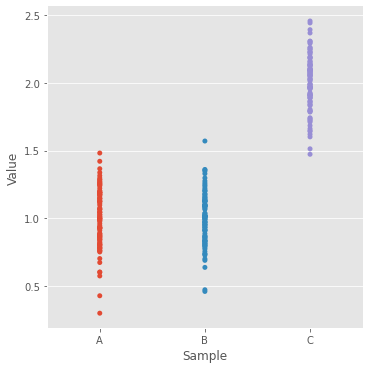

In [30]:
# Size of each sample.
N = 100

# Create three samples.
sampA = np.random.normal(1.0, 0.2, N)
sampB = np.random.normal(1.0, 0.2, N)
sampC = np.random.normal(2.0, 0.2, N)

# Put samples in a single data frame.
sample = ['A'] * N + ['B'] * N + ['C'] * N
values = np.hstack([sampA, sampB, sampC])
dfsamps = pd.DataFrame({'Sample': sample, 'Value': values})

# Visualise samples.
sns.catplot(x='Sample', y='Value', jitter=False, data=dfsamps);

In [31]:
# t-Tests - one for each pair.
t_AB, p_AB = ss.ttest_ind(sampA, sampB)
t_AC, p_AC = ss.ttest_ind(sampA, sampC)
t_BC, p_BC = ss.ttest_ind(sampB, sampC)

print(f"p_AB: {p_AB:.2f}\tp_AC: {p_AC:.2f}\tp_BC: {p_BC:.2f}")

p_AB: 0.98	p_AC: 0.00	p_BC: 0.00


In [32]:
# Let's run 10000 t-tests where the population means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.
# We expect to incorrectly reject the null hypothesis 5% of the time.

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, population 3 mean, standard deviation in both.
mean1, mean2, mean3, stddev = 2.0, 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Generate sample 3.
    sample3 = np.random.normal(loc=mean3, scale=stddev, size=N)
    # Run the t-tests.
    t1, p1 = ss.ttest_ind(sample1, sample2)
    t2, p2 = ss.ttest_ind(sample1, sample3)
    t3, p3 = ss.ttest_ind(sample2, sample3)
    # If any is less than critical, reject.
    if p1 <= critical or p2 <= critical or p3 <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

11.88%


<h2 style="color: rgb(0, 91, 94);">Analaysis of Variance (ANOVA)</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

ANOVA can be used to avoid a higher Type I error rate.


In [33]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
F, P = ss.f_oneway(sampA, sampB, sampC)
print(f"F:{F:.2f} P:{P:.2f}")

F:822.15 P:0.00


In [34]:
# Let's run 10000 ANOVAs where the population means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.
# We expect to incorrectly reject the null hypothesis 5% of the time.

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, population 3 mean, standard deviation in both.
mean1, mean2, mean3, stddev = 2.0, 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Generate sample 3.
    sample3 = np.random.normal(loc=mean3, scale=stddev, size=N)
    # Run the test.
    F, p = ss.f_oneway(sample1, sample2, sample3)
    # If any is less than critical, reject.
    if p <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

5.19%


<h3 style="color: #001a79;">Exercise 2.1</h3>

<hr style="border-top: 1px solid #001a79;" />

<h4>Exercise:</h4>
Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.


example 1

In [35]:
from scipy import stats
rng = np.random.default_rng()

example 2

In [36]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=0.2541618068734763, pvalue=0.7994229109709774)

example 3

In [37]:
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=0.2541618068734763, pvalue=0.7994229121073123)

example 4

In [38]:
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-0.2503817039631942, pvalue=0.8023437106301359)

example 5

In [39]:
stats.ttest_ind(rvs1, rvs3, equal_var=False)

Ttest_indResult(statistic=-0.2503817039631942, pvalue=0.802359544334679)

example 6

In [40]:
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs4)

Ttest_indResult(statistic=-0.5592914833680762, pvalue=0.5761722053653939)

example 7

In [41]:
stats.ttest_ind(rvs1, rvs4, equal_var=False)

Ttest_indResult(statistic=-0.3712849493260998, pvalue=0.7111413257407864)

example 8

In [42]:
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs5)

Ttest_indResult(statistic=-0.7023733118587289, pvalue=0.4827196840976121)

example 9

In [43]:
stats.ttest_ind(rvs1, rvs5, equal_var=False)

Ttest_indResult(statistic=-0.4896545857000022, pvalue=0.6253369302897651)

example 10

When performing a permutation test, more permutations typically yields more accurate results. Use a np.random.Generator to ensure reproducibility


In [44]:
import numpy as np
rng = np.random.default_rng(12345)

stats.ttest_ind(rvs1, rvs5, permutations=10000,random_state=rng)

Ttest_indResult(statistic=-0.7023733118587289, pvalue=0.4901)

In [45]:
a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)

In [46]:
stats.ttest_ind(a, b, trim=.2)

Ttest_indResult(statistic=3.4463884028073513, pvalue=0.01369338726499547)

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">End</h2>